In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df_web = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\reviews_credit_card_data.csv')
df_web.info()
df_web.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3074 non-null   object
 1   bank_name_short  3074 non-null   object
 2   card_category    3074 non-null   object
 3   reviews          3074 non-null   object
dtypes: object(4)
memory usage: 96.2+ KB


(3074, 4)

In [4]:
df_tweet = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\twitterdata\\twitterfiles\\twitterfiles.csv')
df_tweet.info()
df_tweet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ttext          3195 non-null   object 
 1   date           3195 non-null   object 
 2   isretweet      3195 non-null   object 
 3   retweetcount   3195 non-null   float64
 4   favoritecount  3195 non-null   float64
 5   score          3195 non-null   float64
 6   product        3195 non-null   object 
 7   region         3195 non-null   object 
 8   country        3195 non-null   object 
 9   duplicate      3195 non-null   object 
dtypes: float64(3), object(7)
memory usage: 249.8+ KB


(3196, 10)

In [5]:
df_tweet.head()

,ttext,date,isretweet,retweetcount,favoritecount,score,product,region,country,duplicate
0,OnePlus 9RT in stock,19-01-2022 02:04,False,0.0,0.0,0.0,SBI,Delhi,India,False
1,@AxisBankSupport i haven't applied for Flipkar...,19-01-2022 02:44,False,0.0,0.0,0.0,Axis,Delhi,India,False
2,@HDFC_Bank My loan application and credit card...,19-01-2022 03:34,False,0.0,0.0,0.0,hdfc,Delhi,India,False
3,"Hey @AxisBank , i didn't received my credit ca...",19-01-2022 03:53,False,0.0,1.0,-1.0,Axis,Delhi,India,False
4,@TechnoFino \r\nBro I find a term in my hdfc m...,19-01-2022 04:03,False,0.0,0.0,0.0,hdfc,Delhi,India,False


In [6]:
frames = [df_web['reviews'], df_tweet['ttext']]
frame = pd.concat(frames, ignore_index=True)
df = frame.to_frame()
df = df.rename(columns={0:"comment"})

In [7]:
#type(data)
df

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...
...,...
6265,@SBICard_Connect I have to surrender my sbi cr...
6266,@SBICard_Connect 3. SBI Credit Card PULSE\r\n\...
6267,@SBICard_Connect 3. SBI Credit Card PULSE \r\n...
6268,@mehulmpt I use SBI credit card for all intern...


In [8]:
df.head()

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = df['comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [11]:
dfs

0    In my first stay with the Evident Group, I was...
1    From shopping at the supermarket to watching m...
2    Have been using this card for over 2 years now...
3    His card is indeed the one that offers the mos...
4    The Valueback deals on feels are the perfect b...
Name: comment, dtype: object

In [12]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 5144): # iterate through the list of all 5144 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  data_clean = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',str(df.comment[i]))
  # convert all words to lower case
  data_clean = data_clean.lower()
  # split sentences into words
  data_clean = data_clean.split()
  # remove English stop words
  data_clean = [x for x in data_clean if not x in stop_words]
  # stem words to the base form
  data_clean = [ps.stem(x) for x in data_clean]
  # join words to form the original sentences
  data_clean = " ".join(data_clean)
  # append to the list to get all Comments in one place
  corpus.append(data_clean)
#print(corpus)

In [13]:
lex_file = open("C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\AFINN-111.csv", encoding="ISO-8859-1")

In [14]:
word_list = []
print(word_list)
for  record in df:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
comment
tokens
['comment']
['comment']
word_list
[['comment']]


In [15]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [16]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [17]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [18]:
senti_matrix = pd.DataFrame(strength, corpus)

# Lexicon Score

In [19]:
senti_matrix[0:10]

,0
first stay trident group reward bonu point,2
shop supermarket watch movi spend sbi card reward,2
use card year benefit reward good,7
card inde one offer reward fuel save benefit card holder,6
valueback deal fuel perfect benefit card,5
util reward accru sbi card util bill payment,2
groceri shop reward everi inr spent get reward point,4
made use reward point air mile shop citi bank partner,2
tini reward redempt fee reward good,7
got reward worth sbi exceed spend lac,4


In [20]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\export_User_Comments_Lexicon_AFINN.xlsx')
senti_matrix.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA

In [21]:
dflex = pd.read_excel('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\export_User_Comments_Polarity_Category.xlsx')
dflex = dflex[dflex['Polarity_type'] != 'Neutral']
dflex.info()
dflex.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       2316 non-null   float64
 1   UserComments   2316 non-null   object 
 2   Polarity_type  2316 non-null   object 
dtypes: float64(1), object(2)
memory usage: 72.4+ KB


(2316, 3)

In [22]:
dflex.head()
dflex.tail()

,Polarity,UserComments,Polarity_type
0,0.25,first stay trident group reward bonu point,Positive
2,0.70,use card year benefit reward good,Positive
4,1.00,valueback deal fuel perfect benefit card,Positive
6,-0.10,groceri shop reward everi inr spent get reward...,Negative
8,0.70,tini reward redempt fee reward good,Positive


,Polarity,UserComments,Polarity_type
5128,0.700000,good phoneif sbi credit card use youll get,Positive
5132,-0.300000,connect sir complaint still pend want waival a...,Negative
5135,-0.500000,payment sbi credit card club feb via upi payme...,Negative
5138,-1.000000,connect worst credit card compani get cardlast...,Negative
5140,0.357143,pleas make special sale laptop also hdfc sbi c...,Positive


In [23]:
dflex.groupby('Polarity_type').size()

Polarity_type
Negative     520
Positive    1796
dtype: int64

# Category

In [24]:
dflex.columns

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

In [25]:
pd.isnull(dflex)

,Polarity,UserComments,Polarity_type
0,False,False,False
2,False,False,False
4,False,False,False
6,False,False,False
8,False,False,False
...,...,...,...
5128,False,False,False
5132,False,False,False
5135,False,False,False
5138,False,False,False


In [26]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dflex_series = pd.isnull(dflex["Polarity_type"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dflex[dflex_series]

,Polarity,UserComments,Polarity_type


In [27]:
# importing pandas module 
import pandas as pd 

# replacing na values in college with No college 
dflex["Polarity_type"].fillna("Negative", inplace = True)

dflex

,Polarity,UserComments,Polarity_type
0,0.250000,first stay trident group reward bonu point,Positive
2,0.700000,use card year benefit reward good,Positive
4,1.000000,valueback deal fuel perfect benefit card,Positive
6,-0.100000,groceri shop reward everi inr spent get reward...,Negative
8,0.700000,tini reward redempt fee reward good,Positive
...,...,...,...
5128,0.700000,good phoneif sbi credit card use youll get,Positive
5132,-0.300000,connect sir complaint still pend want waival a...,Negative
5135,-0.500000,payment sbi credit card club feb via upi payme...,Negative
5138,-1.000000,connect worst credit card compani get cardlast...,Negative


In [28]:
dflex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       2316 non-null   float64
 1   UserComments   2316 non-null   object 
 2   Polarity_type  2316 non-null   object 
dtypes: float64(1), object(2)
memory usage: 72.4+ KB


In [29]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='Polarity_type'>

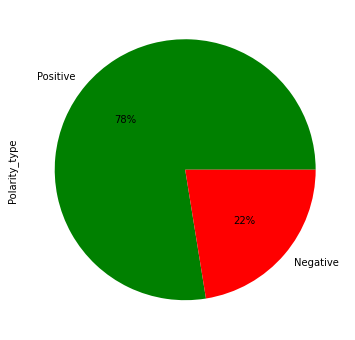

In [30]:
dflex.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])

<AxesSubplot:>

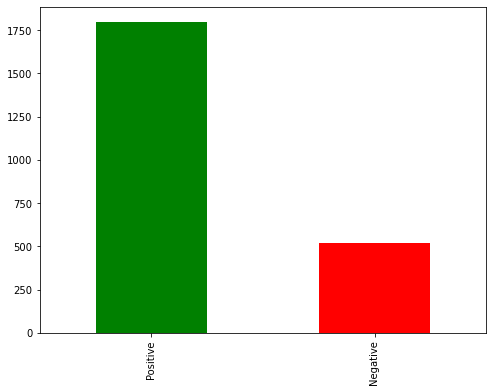

In [31]:
dflex.Polarity_type.value_counts().plot(kind='bar',  color=["green","red"])

In [32]:
dflex.Polarity_type.value_counts()

Positive    1796
Negative     520
Name: Polarity_type, dtype: int64

# Label Encoding

In [33]:
#convert Polaty_type Negative, Neutral and Positive to 1, 2, 3
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
le.fit(dflex['Polarity_type'])

LabelEncoder()

In [35]:
list(le.classes_)

['Negative', 'Positive']

In [36]:
dflex_label = le.transform(dflex['Polarity_type'])

In [37]:
le.inverse_transform([0,1])

array(['Negative', 'Positive'], dtype=object)

In [38]:
dflex['Polarity_type'] = dflex_label
dflex.info()
dflex.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       2316 non-null   float64
 1   UserComments   2316 non-null   object 
 2   Polarity_type  2316 non-null   int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 63.3+ KB


Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

# Count Vectorizer

In [39]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [40]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [41]:
dflex['clean_comment']=dflex['UserComments'].apply(lambda x: comment_to_words(x))
dflex['comment_length']=dflex['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dflex,test_size=0.25,random_state=42)

In [42]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Classifiers

In [45]:
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
    GaussianNB()]

Accuracy of SVC is 0.772020725388601
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87       579

    accuracy                           0.77       579
   macro avg       0.50      0.39      0.44       579
weighted avg       1.00      0.77      0.87       579



C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x432 with 0 Axes>

C:\Users\madhu\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x232ff355f10>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x232ff35bf10>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

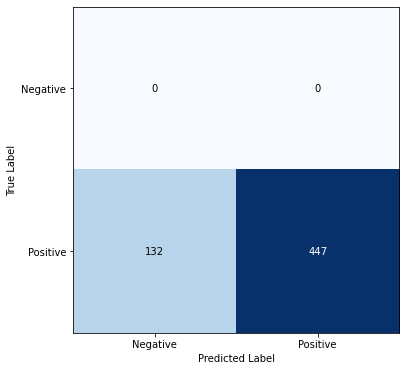

Accuracy of DecisionTreeClassifier is 0.927461139896373
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       146
           1       0.94      0.97      0.95       433

    accuracy                           0.93       579
   macro avg       0.92      0.89      0.90       579
weighted avg       0.93      0.93      0.93       579



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x232ff3a3190>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x232ff3ac190>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

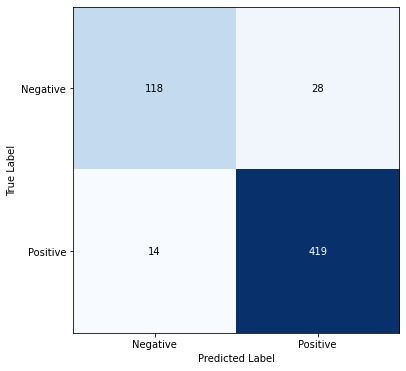

Accuracy of RandomForestClassifier is 0.9291882556131261
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        99
           1       0.99      0.92      0.96       480

    accuracy                           0.93       579
   macro avg       0.86      0.94      0.89       579
weighted avg       0.94      0.93      0.93       579



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x232ff383d90>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x232ff35bfa0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

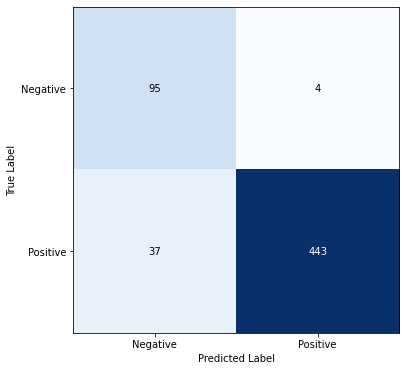

Accuracy of GradientBoostingClassifier is 0.9326424870466321
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       117
           1       0.97      0.94      0.96       462

    accuracy                           0.93       579
   macro avg       0.88      0.92      0.90       579
weighted avg       0.94      0.93      0.93       579



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x232ff34f100>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x232ff3f9160>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

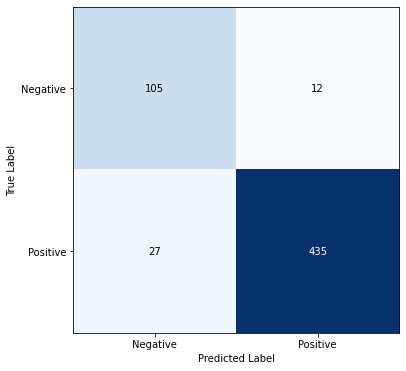

Accuracy of GaussianNB is 0.7858376511226253
              precision    recall  f1-score   support

           0       0.82      0.52      0.64       208
           1       0.78      0.94      0.85       371

    accuracy                           0.79       579
   macro avg       0.80      0.73      0.74       579
weighted avg       0.79      0.79      0.77       579



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x232846f3a60>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x232846fba60>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

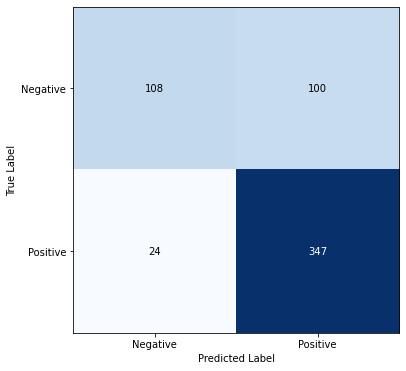

In [46]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Polarity_type'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Polarity_type'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity_type'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Polarity_type']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Polarity_type'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Compare Classifiers

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x232fe9aa100>,
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

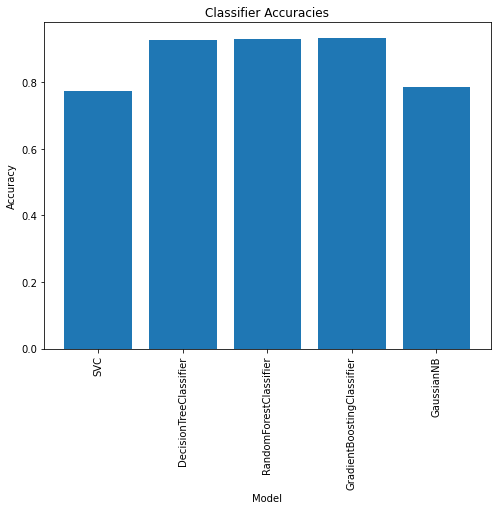

In [47]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy)
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')